In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
df=pd.read_csv("Flipkart Mobile.csv")

In [3]:
df

,brand,model,base_color,ROM,RAM,processor,display_size,screen_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent
0,Apple,iPhone SE,Black,64,2,Water,4.7,Very Small,1,1,1800,4.5,115935,32999,0.17
1,Apple,iPhone 12 Mini,Red,64,4,Ceramic,5.4,Small,2,1,2815,4.5,3898,57149,0.04
2,Apple,iPhone SE,Red,64,2,Water,4.7,Very Small,1,1,1800,4.5,115935,32999,0.17
3,Apple,iPhone XR,Others,64,3,iOS,6.1,Medium,1,1,2942,4.6,96594,42999,0.10
4,Apple,iPhone 12,Red,128,4,Ceramic,6.1,Medium,2,1,2815,4.6,12669,69149,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Xiaomi,Redmi 6 Pro,Black,32,3,Qualcomm,5.8,Small,2,1,4000,4.3,11220,7999,0.30
426,Xiaomi,Redmi 6 Pro,Red,64,4,Qualcomm,5.8,Small,2,1,4000,4.3,10696,9699,0.28
427,Xiaomi,Mi 11 Lite,Others,128,6,Qualcomm,6.5,Large,3,1,4250,4.2,9325,21999,0.12
428,Xiaomi,Redmi 8A Dual,Blue,32,3,Qualcomm,6.2,Medium,2,1,5000,4.2,16322,8299,0.07


In [4]:
#Checking Null Values

In [5]:
df.isnull().sum()

brand               0
model               0
base_color          0
ROM                 0
RAM                 0
processor           0
display_size        0
screen_size         0
num_rear_camera     0
num_front_camera    0
battery_capacity    0
ratings             0
num_of_ratings      0
sales_price         0
discount_percent    0
dtype: int64

In [6]:
#Which Brand Selled The Most

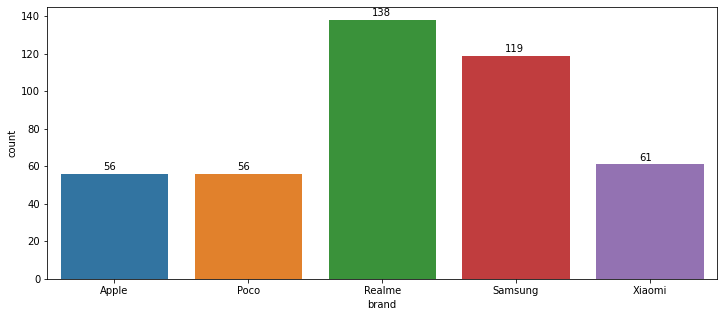

In [7]:
plt.figure(figsize=(12,5))
ax=sns.countplot(df['brand'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.32, p.get_height()+1), va = 'bottom', color = 'black')

In [8]:
#Which Color Selled The Most

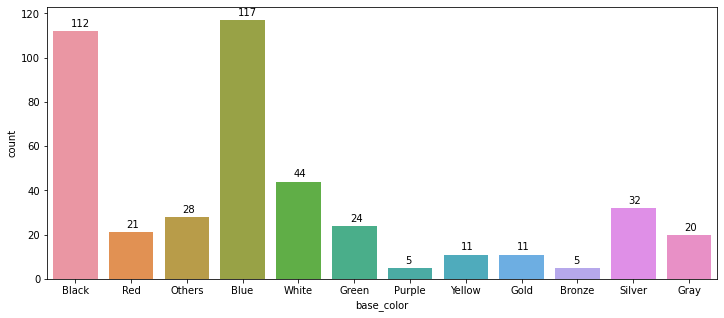

In [9]:
plt.figure(figsize=(12,5))
ax=sns.countplot(df['base_color'])
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.32, p.get_height()+1), va = 'bottom', color = 'black')

In [10]:
#Distribution of Sales Price

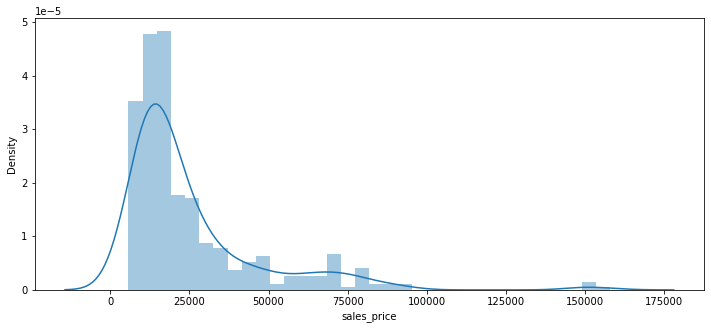

In [11]:
plt.figure(figsize=(12,5))
sns.distplot(df['sales_price'])
plt.show()

In [12]:
#Which Screen Size People Usually Prefer The Most

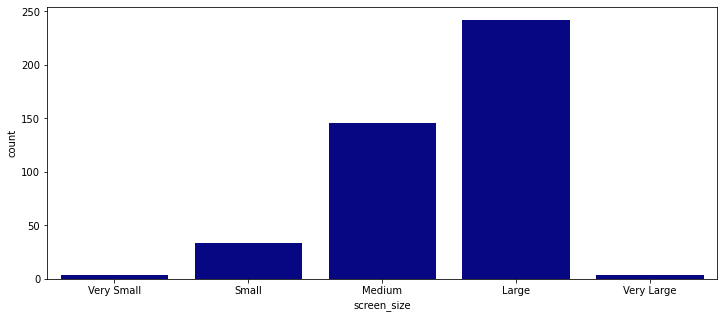

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(df['screen_size'],color='darkblue',saturation=0.90)
plt.show()

In [14]:
#Which Screen Size People Usually Prefer The Most And From Which Brand

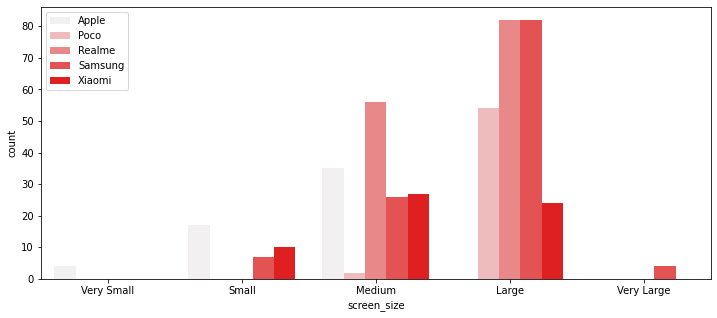

In [15]:
plt.figure(figsize=(12,5))
sns.countplot(df['screen_size'],color='red',hue=df['brand'])
plt.legend(loc='upper left')


In [16]:
#People Mostly Prefer 3 or 4 Rear Camera Phones

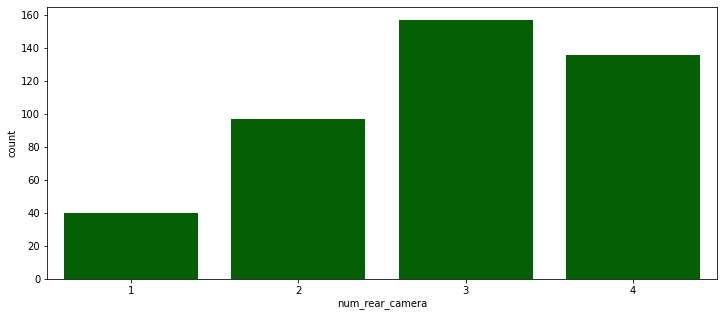

In [17]:
plt.figure(figsize=(12,5))
sns.countplot(df['num_rear_camera'],color='darkgreen',saturation=0.90)
plt.show()

In [18]:
#People Mostly Prefer 3 or 4 Rear Camera Phones And From Which Brand

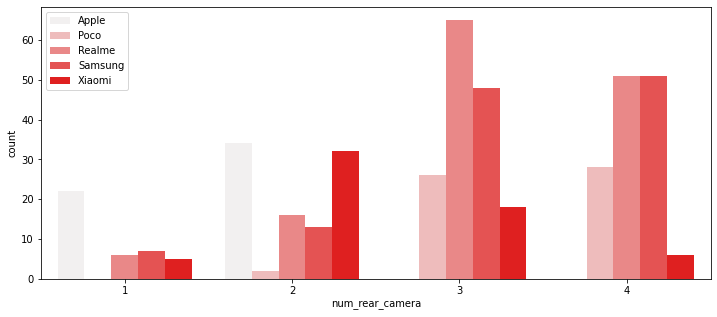

In [19]:
plt.figure(figsize=(12,5))
sns.countplot(df['num_rear_camera'],color='red',hue=df['brand'])
plt.legend(loc='upper left')


In [20]:
#Which Rating Mobile Has Highest Discount

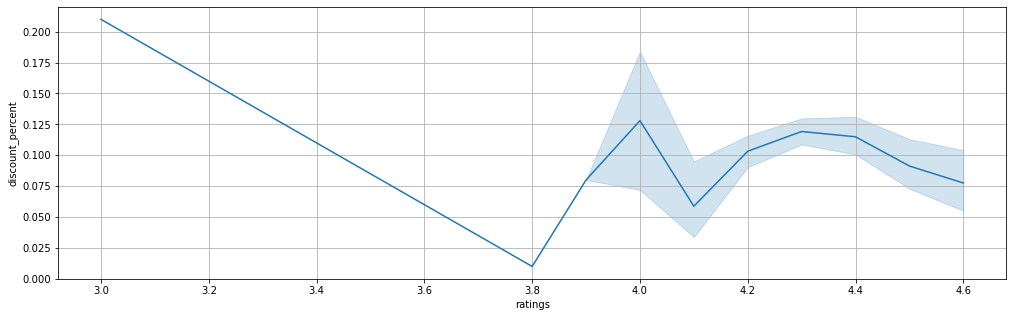

In [21]:
plt.figure(figsize=(17,5))
sns.lineplot(x=df['ratings'],y=df['discount_percent'])
plt.grid()

In [22]:
#Which Rating Mobile Has Highest Discount And From Which Brand

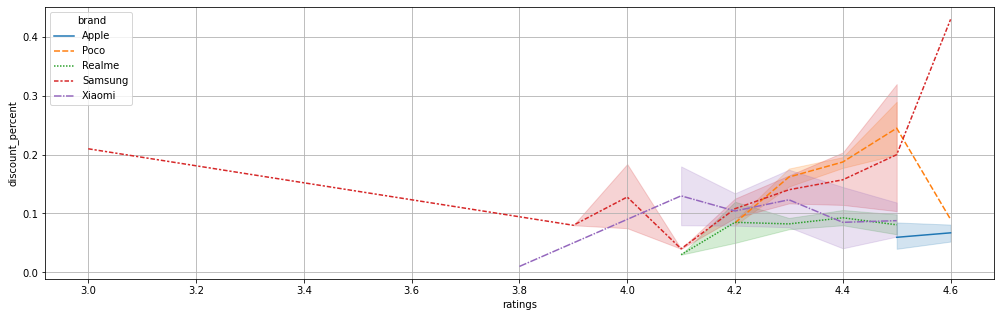

In [23]:
plt.figure(figsize=(17,5))
sns.lineplot(x=df['ratings'],y=df['discount_percent'],hue=df['brand'],style=df['brand'],markers=False)
plt.grid()

In [24]:
#Which Brand Has Highest Discount

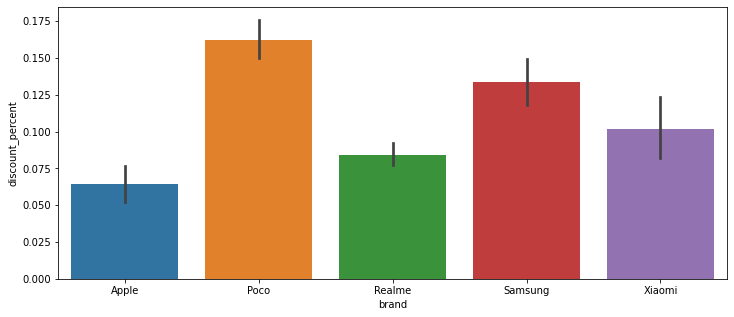

In [25]:
plt.figure(figsize=(12,5))
sns.barplot(x=df['brand'],y=df['discount_percent'])
plt.show()


In [26]:
#Checking For Outliers

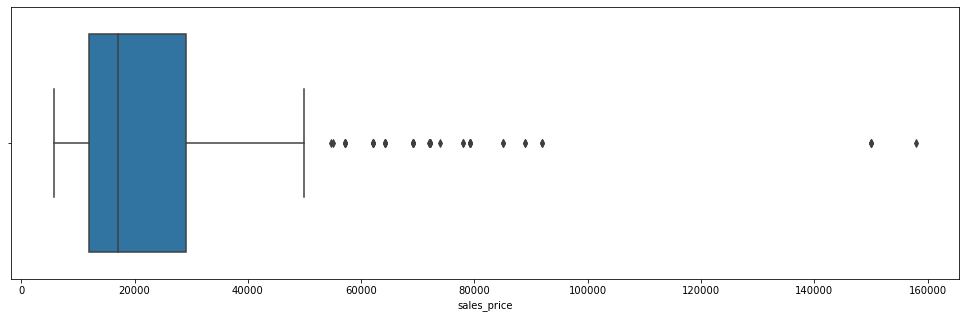

In [27]:
plt.figure(figsize=(17,5))
sns.boxplot(df['sales_price'])
plt.show()

In [28]:
#We Have Some Outliers,Now We Have To Remove Them

In [29]:
IQR=(df['sales_price'].quantile(0.75))-(df['sales_price'].quantile(0.25))
IQR

17000.0

In [30]:
lb=abs(df['sales_price'].quantile(0.25))-(1.5*IQR)
ub=abs(df['sales_price'].quantile(0.75))+(1.5*IQR)
lb,ub


(-13501.0, 54499.0)

In [31]:
df1=df[(df['sales_price']<=ub) & (df['sales_price']>=lb)]

In [32]:
newdf=pd.concat([df,df1]).drop_duplicates(keep=False)


In [33]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 1 to 408
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             49 non-null     object 
 1   model             49 non-null     object 
 2   base_color        49 non-null     object 
 3   ROM               49 non-null     int64  
 4   RAM               49 non-null     int64  
 5   processor         49 non-null     object 
 6   display_size      49 non-null     float64
 7   screen_size       49 non-null     object 
 8   num_rear_camera   49 non-null     int64  
 9   num_front_camera  49 non-null     int64  
 10  battery_capacity  49 non-null     int64  
 11  ratings           49 non-null     float64
 12  num_of_ratings    49 non-null     int64  
 13  sales_price       49 non-null     int64  
 14  discount_percent  49 non-null     float64
dtypes: float64(3), int64(7), object(5)
memory usage: 6.1+ KB


In [34]:
#Total 49 Outliers Found

In [35]:
#Distribution Before Removing Outliers

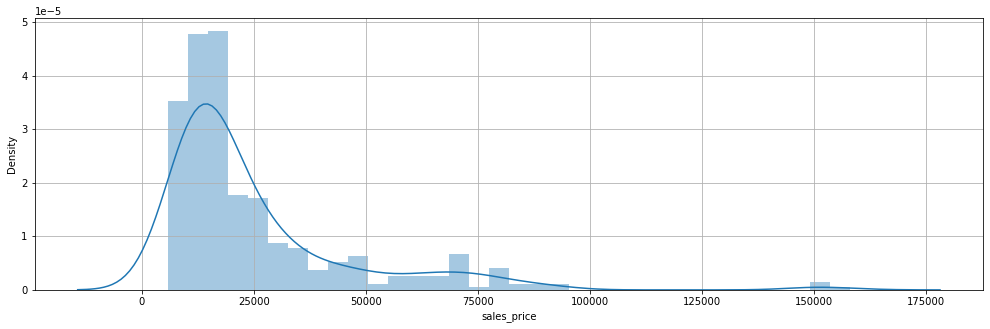

In [36]:
plt.figure(figsize=(17,5))
sns.distplot(df['sales_price'])
plt.grid()

In [37]:
#Distribution After Removing Outliers

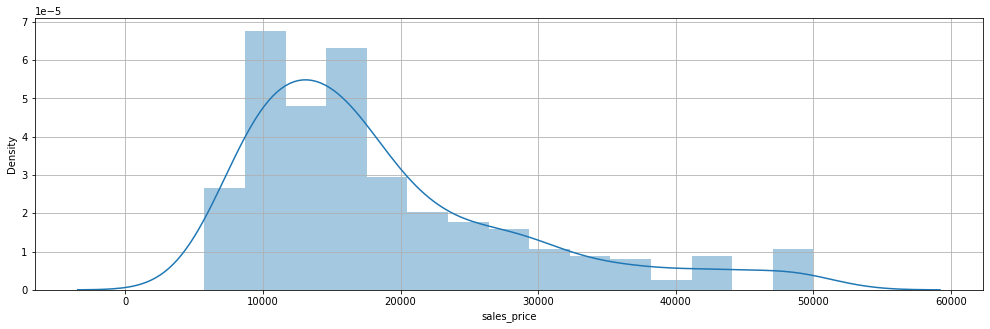

In [38]:
plt.figure(figsize=(17,5))
sns.distplot(df1['sales_price'])
plt.grid()

In [39]:
#Which Brand Gives Highest Battery Capacity

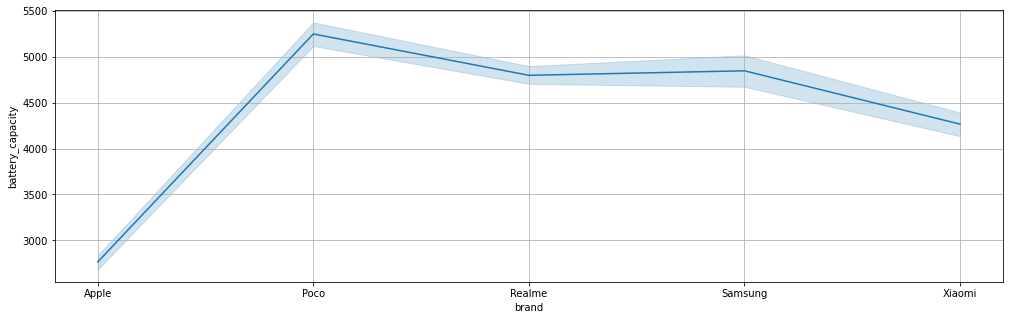

In [40]:
plt.figure(figsize=(17,5))
sns.lineplot(x=df['brand'],y=df['battery_capacity'])
plt.grid()
plt.show()

In [41]:
df1.head()

,brand,model,base_color,ROM,RAM,processor,display_size,screen_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent
0,Apple,iPhone SE,Black,64,2,Water,4.7,Very Small,1,1,1800,4.5,115935,32999,0.17
2,Apple,iPhone SE,Red,64,2,Water,4.7,Very Small,1,1,1800,4.5,115935,32999,0.17
3,Apple,iPhone XR,Others,64,3,iOS,6.1,Medium,1,1,2942,4.6,96594,42999,0.10
15,Apple,iPhone XR,White,128,3,Water,6.1,Medium,1,1,2942,4.6,96594,47999,0.09
21,Apple,iPhone XR,Yellow,128,3,Water,6.1,Medium,1,1,2942,4.6,96594,47999,0.09


In [42]:
#Encoding The Categorical Columns

In [43]:
lv1=LabelEncoder()
lv2=LabelEncoder()
lv3=LabelEncoder()
lv4=LabelEncoder()
lv5=LabelEncoder()



In [44]:
df1['brand']=lv1.fit_transform(df1['brand'])
df1['model']=lv2.fit_transform(df1['model'])
df1['base_color']=lv3.fit_transform(df1['base_color'])
df1['processor']=lv4.fit_transform(df1['processor'])
df1['screen_size']=lv5.fit_transform(df1['screen_size'])

In [45]:
#Finding Highly Correlated Features And Removing Them By Using HeatMap

In [46]:
cor=df1.corr()
cor

,brand,model,base_color,ROM,RAM,processor,display_size,screen_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent
brand,1.000000,-0.055106,-0.105196,-0.115640,0.044366,-0.198883,0.042209,0.040207,0.048886,0.061129,0.095813,-0.371341,-0.098584,-0.312522,-0.048130
model,-0.055106,1.000000,0.095720,0.062260,-0.006903,0.421673,-0.195924,0.165861,-0.306039,0.224559,-0.269516,0.236785,0.048240,0.308889,0.021477
base_color,-0.105196,0.095720,1.000000,0.108326,0.078765,0.068776,-0.006095,0.016796,0.016970,0.061860,-0.100165,0.054496,-0.084168,0.177226,-0.050623
ROM,-0.115640,0.062260,0.108326,1.000000,0.788394,0.037495,0.313930,-0.125306,0.378211,0.179778,0.065677,-0.041583,-0.250156,0.532957,-0.025711
RAM,0.044366,-0.006903,0.078765,0.788394,1.000000,-0.042030,0.433548,-0.215524,0.544769,0.188078,0.184939,-0.142020,-0.232914,0.402925,-0.008059
processor,-0.198883,0.421673,0.068776,0.037495,-0.042030,1.000000,-0.280430,0.320767,-0.277902,0.165434,-0.518698,0.428124,0.007281,0.396336,-0.212611
display_size,0.042209,-0.195924,-0.006095,0.313930,0.433548,-0.280430,1.000000,-0.865844,0.616818,0.088257,0.679319,-0.285376,-0.103147,-0.076341,0.009454
screen_size,0.040207,0.165861,0.016796,-0.125306,-0.215524,0.320767,-0.865844,1.000000,-0.493720,-0.053707,-0.609308,0.321394,0.094731,0.131827,-0.027853
num_rear_camera,0.048886,-0.306039,0.016970,0.378211,0.544769,-0.277902,0.616818,-0.493720,1.000000,0.040056,0.540079,-0.292227,-0.158965,-0.091836,0.079515
num_front_camera,0.061129,0.224559,0.061860,0.179778,0.188078,0.165434,0.088257,-0.053707,0.040056,1.000000,-0.135603,0.101514,0.059248,0.091647,-0.058694


<AxesSubplot:>

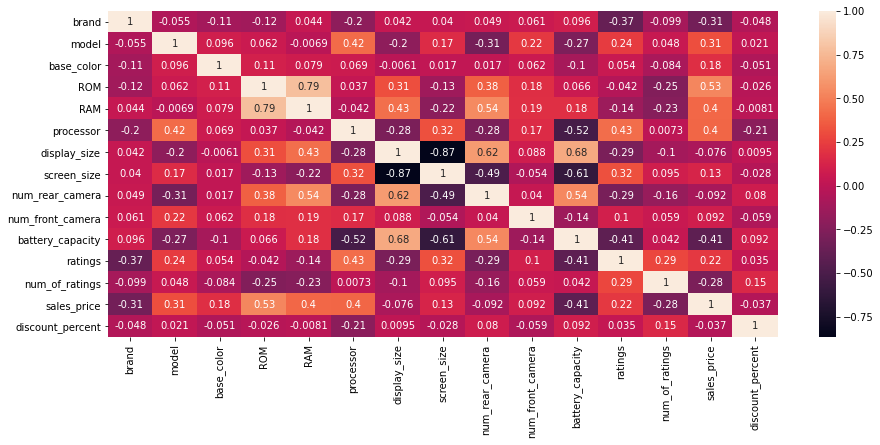

In [47]:
plt.figure(figsize=(15,6))
sns.heatmap(cor,annot=True)

In [48]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [49]:
features=correlation(df1,0.85) ### I am Just Giving Threshold as 0.85
features

{'screen_size'}

In [50]:
df1.drop(columns=['screen_size'],inplace=True)

In [51]:
#Let Us Split The Data Into Train-Test-Split

In [52]:
x=df1.drop(columns=['sales_price'])
y=df1['sales_price']

In [53]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [54]:
x_train.head()

,brand,model,base_color,ROM,RAM,processor,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,discount_percent
223,2,0,0,64,4,1,6.2,2,1,4230,4.4,78903,0.04
351,3,45,4,128,8,0,6.7,4,1,7000,4.3,28475,0.18
271,3,53,1,128,8,2,6.4,4,1,6000,4.3,1714,0.01
379,4,92,8,64,6,3,6.3,2,2,4000,4.5,126998,0.05
168,2,23,4,256,8,3,6.4,3,1,4300,4.3,946,0.06


In [55]:
y_train.head()

223    10499
351    25999
271    18666
379    12749
168    29999
Name: sales_price, dtype: int64

In [56]:
#Now We Will Find Those Features On Which Target Variable Is Highly Depends on

In [57]:
mutual_info=mutual_info_classif(x_train,y_train)



mutual_info

array([1.86572933, 1.29500045, 0.        , 2.76269255, 2.01659702,
       1.35062981, 1.25135778, 1.13109038, 2.5495656 , 1.40840127,
       1.12792628, 1.26025925, 1.84968011])

In [58]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns

In [59]:
mutual_info.sort_values(ascending=False)

ROM                 2.762693
num_front_camera    2.549566
RAM                 2.016597
brand               1.865729
discount_percent    1.849680
battery_capacity    1.408401
processor           1.350630
model               1.295000
num_of_ratings      1.260259
display_size        1.251358
num_rear_camera     1.131090
ratings             1.127926
base_color          0.000000
dtype: float64

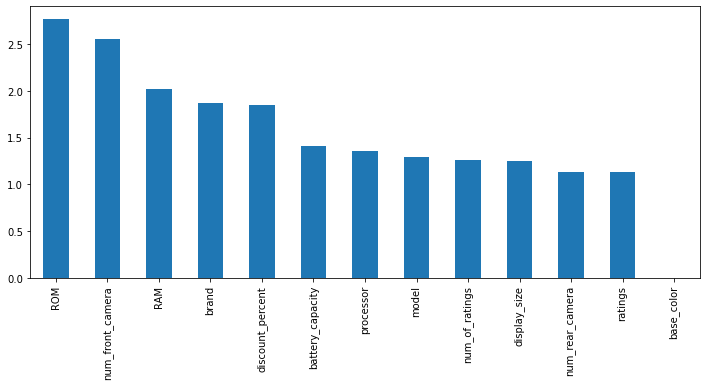

In [60]:
plt.figure(figsize=(12,5))
mutual_info.sort_values(ascending=False).plot.bar()
plt.show()

In [61]:
#Now We Will Select Top 9 Features

In [62]:
x_train.drop(columns=['num_of_ratings','processor','num_rear_camera','base_color'],inplace=True)
x_test.drop(columns=['num_of_ratings','processor','num_rear_camera','base_color'],inplace=True)

In [63]:
x_train.head()

,brand,model,ROM,RAM,display_size,num_front_camera,battery_capacity,ratings,discount_percent
223,2,0,64,4,6.2,1,4230,4.4,0.04
351,3,45,128,8,6.7,1,7000,4.3,0.18
271,3,53,128,8,6.4,1,6000,4.3,0.01
379,4,92,64,6,6.3,2,4000,4.5,0.05
168,2,23,256,8,6.4,1,4300,4.3,0.06


In [64]:
x_test.head()

,brand,model,ROM,RAM,display_size,num_front_camera,battery_capacity,ratings,discount_percent
179,2,1,128,8,6.3,1,4035,4.5,0.05
355,3,52,64,4,6.4,1,6000,4.3,0.09
419,4,84,32,2,5.5,1,3000,4.3,0.28
314,3,29,64,6,6.5,1,5000,4.2,0.01
248,2,73,128,4,6.5,1,5000,4.5,0.07


In [65]:
#Now Data Is Cleaned And We Will Do Some Predictions

# Logistic Regression Algorithm

In [66]:
lr=LogisticRegression()

lr.fit(x_train,y_train)

LogisticRegression()

In [67]:
y_predLogistic=lr.predict(x_test)

In [68]:
accuracy_score(y_test,y_predLogistic)

0.15584415584415584

In [69]:
#Here Logistic Regression Failed, Because We Got Accuracy Only Of 15.58%

# Decision Tree Classifier Algorithm

In [70]:
dt=DecisionTreeClassifier()

dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [71]:
y_predDecision=dt.predict(x_test)

In [72]:
accuracy_score(y_test,y_predDecision)

0.6363636363636364

In [73]:
#Here Decision Tree Classifier Was Way Better Than Logistic Regression, We Got Accuracy Of 63.63%

# KNN - K Nearest Neighbor Algorithm

In [74]:
knn=KNeighborsClassifier()

In [75]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [76]:
y_predKnn=knn.predict(x_test)

In [77]:
accuracy_score(y_test,y_predKnn)

0.18181818181818182

In [78]:
#Here KNN also Failed because we got accuracy only of 18.18%

# Random Forest Algorithm

In [79]:
rf=RandomForestClassifier()

In [80]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [81]:
y_predRf=rf.predict(x_test)

In [82]:
accuracy_score(y_test,y_predRf)

0.6363636363636364

In [83]:
#Here We Got Accuracy Same As Decision Tree 63.63% 

# Random Forest With Cross Validation

In [84]:
np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),x,y,cv=10,scoring='accuracy'))

0.713697705802969

In [85]:
#As we can see our Random Forest Model's Accuracy is increased with the help of cross validation method

In [86]:
cross_val_score(RandomForestClassifier(max_samples=0.75),x,y,cv=10,scoring='accuracy')

array([0.79487179, 0.76315789, 0.73684211, 0.68421053, 0.81578947,
       0.81578947, 0.63157895, 0.63157895, 0.68421053, 0.57894737])

In [87]:
#As we clearly see after training our Random Forest model with 10 diffrent samples it gives 10 diffrent accuracy scores

# Decision Tree With Cross Validation

In [88]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6587044534412955

In [89]:
#As we can see our Decision Tree Model's Accuracy is increased with the help of cross validation method

In [90]:
cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')

array([0.71794872, 0.76315789, 0.71052632, 0.63157895, 0.73684211,
       0.81578947, 0.57894737, 0.57894737, 0.63157895, 0.52631579])

In [91]:
#As we clearly see after training our Decision Tree model with 10 diffrent samples it gives 10 diffrent accuracy scores

# Random Forest Algorithm With Hyperparameter Tuning also used Grid Search For Best Parameters

In [92]:
# Number of trees in random forest
n_estimators = [20,60,100,120]

# Number of features to consider at every split
max_features = [0.2,0.6,1.0]

# Maximum number of levels in tree
max_depth = [2,8,None]

# Number of samples
max_samples = [0.5,0.75,1.0]

In [93]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
              'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [94]:
rf = RandomForestClassifier()

In [95]:
rf_grid = GridSearchCV(estimator = rf, 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=2, 
                       n_jobs = -1)

In [96]:
rf_grid.fit(x_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [97]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.75,
 'n_estimators': 120}

In [98]:
rf_grid.best_score_

0.6779234972677595